In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
titanic = pd.read_csv('Titanic.csv')

In [3]:
titanic.head()

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
0,male,22.0,1,0,7.2500,S,Third,man,False,0
1,female,38.0,1,0,71.2833,C,First,woman,False,1
2,female,26.0,0,0,7.9250,S,Third,woman,True,1
3,female,35.0,1,0,53.1000,S,First,woman,False,1
4,male,35.0,0,0,8.0500,S,Third,man,True,0


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       891 non-null    object 
 1   age       714 non-null    float64
 2   sibsp     891 non-null    int64  
 3   parch     891 non-null    int64  
 4   fare      891 non-null    float64
 5   embarked  889 non-null    object 
 6   class     891 non-null    object 
 7   who       891 non-null    object 
 8   alone     891 non-null    bool   
 9   survived  891 non-null    int64  
dtypes: bool(1), float64(2), int64(3), object(4)
memory usage: 63.6+ KB


In [5]:
titanic.isnull().sum()

sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
class         0
who           0
alone         0
survived      0
dtype: int64

In [6]:
df = pd.DataFrame(titanic)

In [54]:
df.describe()

,age,sibsp,parch,fare,survived
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208,0.383838
std,13.002015,1.102743,0.806057,49.693429,0.486592
min,0.420000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,7.910400,0.000000
50%,29.699118,0.000000,0.000000,14.454200,0.000000
75%,35.000000,1.000000,0.000000,31.000000,1.000000
max,80.000000,8.000000,6.000000,512.329200,1.000000


In [12]:
#Impute NULL age values with mean
df['age'].fillna(value=df['age'].mean(), inplace=True)

In [52]:
df.embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [51]:
#Impute NULL embarked values with one of the catergory
df.embarked.fillna('S',inplace=True)

In [50]:
df.embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [55]:
#Analysing the dataset post NULL value imputration
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   sex           891 non-null    object  
 1   age           891 non-null    float64 
 2   sibsp         891 non-null    int64   
 3   parch         891 non-null    int64   
 4   fare          891 non-null    float64 
 5   embarked      891 non-null    object  
 6   class         891 non-null    object  
 7   who           891 non-null    object  
 8   alone         891 non-null    bool    
 9   survived      891 non-null    int64   
 10  Wealth        891 non-null    object  
 11  Age_Category  891 non-null    category
dtypes: bool(1), category(1), float64(2), int64(3), object(5)
memory usage: 71.6+ KB


In [49]:
#Create a new column 'Age_Category' with bins and categorizd the people as per age
df['Age_Category']=pd.cut(df.age, bins=[0,15,60,90], labels=['Child','Adult','Old'])

In [45]:
df.head(10)

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived,Wealth,Age_Category
0,male,22.000000,1,0,7.2500,S,Third,man,False,0,Poor,Adult
1,female,38.000000,1,0,71.2833,C,First,woman,False,1,Rich,Adult
2,female,26.000000,0,0,7.9250,S,Third,woman,True,1,Poor,Adult
3,female,35.000000,1,0,53.1000,S,First,woman,False,1,Rich,Adult
4,male,35.000000,0,0,8.0500,S,Third,man,True,0,Poor,Adult
5,male,29.699118,0,0,8.4583,Q,Third,man,True,0,Poor,Adult
6,male,54.000000,0,0,51.8625,S,First,man,True,0,Rich,Adult
7,male,2.000000,3,1,21.0750,S,Third,child,False,0,Poor,Child
8,female,27.000000,0,2,11.1333,S,Third,woman,False,1,Poor,Adult
9,female,14.000000,1,0,30.0708,C,Second,child,False,1,Poor,Child


In [48]:
survival_by_age = df.groupby('Age_Category')['survived'].mean()

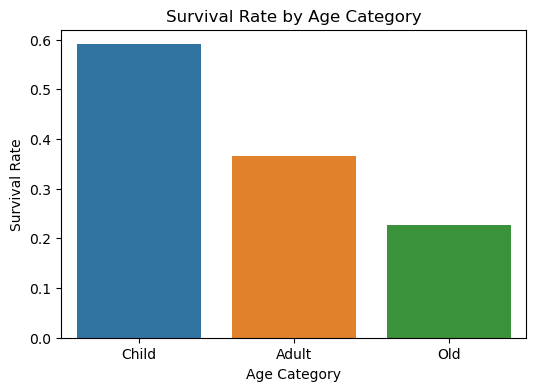

In [19]:
# Create a bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x=survival_by_age.index, y=survival_by_age.values)
plt.title("Survival Rate by Age Category")
plt.ylabel("Survival Rate")
plt.xlabel("Age Category")
ax = sns.countplot(x = 'Gender',data = df)

for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

In [21]:
titanic['Wealth'] = ['Rich' if pclass == "First" else 'Poor' for pclass in titanic['class']]
survival_by_wealth = titanic.groupby('Wealth')['survived'].mean()

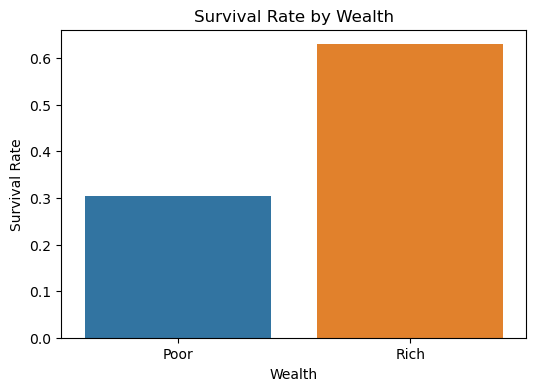

In [22]:
# Create a bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x=survival_by_wealth.index, y=survival_by_wealth.values)
plt.title("Survival Rate by Wealth")
plt.ylabel("Survival Rate")
plt.xlabel("Wealth")
plt.show()

In [27]:
# c. Survival Rate of Women
survival_by_gender = titanic.groupby('sex')['survived'].mean()

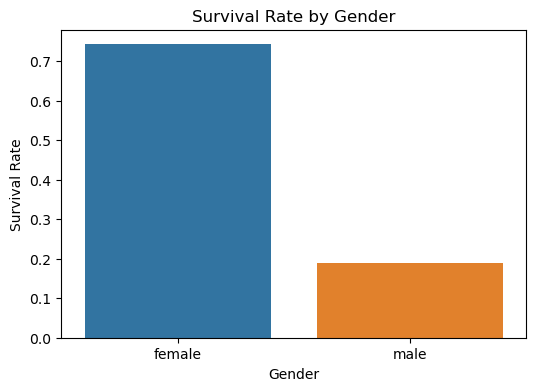

In [28]:
# Create a bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x=survival_by_gender.index, y=survival_by_gender.values)
plt.title("Survival Rate by Gender")
plt.ylabel("Survival Rate")
plt.xlabel("Gender")
plt.show()